In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_players = pd.read_csv("scraping/players.csv")
df_salaries = pd.read_csv("scraping/salaries.csv")
df_player_data = pd.read_csv("scraping/player_data.csv")

In [130]:
df_salaries["normalized_salary"] = df_salaries["salary"] / df_salaries["salary_cap"]

In [131]:
def calculate_years_to_max_sal(link):
    df_sal = df_salaries[df_salaries["link"] == link]    
    if df_sal.shape[0] == 0:
        return None
    max_sal_yr = df_sal[df_sal["normalized_salary"] == df_sal["normalized_salary"].max()]["season"].min()
    first_yr = df_sal["season"].min()
    return max_sal_yr - first_yr

def calculate_years_to_max_pts(link):
    df_dat = df_player_data[df_player_data["link"] == link]    
    if df_dat.shape[0] == 0:
        return None
    max_pts_yr = df_dat[df_dat["pts_per_g"] == df_dat["pts_per_g"].max()]["season"].min()
    first_yr = df_dat["season"].min()
    return max_pts_yr - first_yr

def calculate_years_to_good_pts(link):
    df_dat = df_player_data[df_player_data["link"] == link]    
    if df_dat.shape[0] == 0:
        return None
    max_pts_yr = df_dat[df_dat["pts_per_g"] >= 0.9 * df_dat["pts_per_g"].max()]["season"].min()
    first_yr = df_dat["season"].min()
    return max_pts_yr - first_yr

def calculate_yrs_to_all_star(link):
    df_dat = df_player_data[df_player_data["link"] == link]    
    if df_dat.shape[0] == 0 or df_dat[df_dat["all_star"] == 1].shape[0] == 0:
        return None
    all_star_yr = df_dat[df_dat["all_star"] == 1]["season"].min()
    first_yr = df_dat["season"].min()
    return all_star_yr - first_yr

def calculate_max_pts(link):
    df_dat = df_player_data[df_player_data["link"] == link]    
    if df_dat.shape[0] == 0:
        return None
    return df_dat["pts_per_g"].max()

def calculate_career_length(link):
    df_sal = df_salaries[df_salaries["link"] == link]    
    return df_sal.shape[0]

def is_active_player(link):
    df_sal = df_salaries[df_salaries["link"] == link]  
    return df_sal[df_sal["season"] == 2020].shape[0]

df_players["career"] = df_players["link"].apply(calculate_career_length)
df_players["active"] = df_players["link"].apply(is_active_player)
df_players["max_sal_yrs"] = df_players["link"].apply(calculate_years_to_max_sal)
df_players["max_pts_yrs"] = df_players["link"].apply(calculate_years_to_max_pts)
df_players["good_pts_yrs"] = df_players["link"].apply(calculate_years_to_good_pts)
df_players["max_pts"] = df_players["link"].apply(calculate_max_pts)
df_players["all_star_yrs"] = df_players["link"].apply(calculate_yrs_to_all_star)

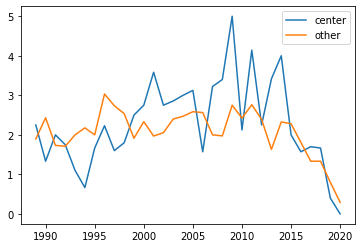

In [138]:
df_players[~df_players["all_star_yrs"].isna()].shape

# display(df_players[df_players["position"].str.contains("Center")].groupby(["year"]).mean()["all_star_yrs"])
# display(df_players[~df_players["position"].str.contains("Center")].groupby(["year"]).mean()["all_star_yrs"])
good_centers = df_players[df_players["position"].str.contains("Center")].groupby(["year"]).mean()["good_pts_yrs"]
good_others = df_players[~df_players["position"].str.contains("Center")].groupby(["year"]).mean()["good_pts_yrs"]

plt.figure()
plt.plot(good_centers, label="center")
plt.plot(good_others, label="other")
plt.legend()
plt.show()


In [133]:
df_players0 = df_players[(df_players["active"] == 0) & (df_players["career"] >= 5) & (df_players["career"] <= 10)]
df_players0 = df_players

In [134]:
df_players1 = df_players0[df_players0["year"] < 2007]
print(df_players1[df_players1["position"] == "Center"]["career"].mean())
print(df_players1[df_players1["position"] != "Center"]["career"].mean())
print(df_players1[df_players1["position"] == "Center"]["max_sal_yrs"].mean())
print(df_players1[df_players1["position"] != "Center"]["max_sal_yrs"].mean())
print(df_players1[df_players1["position"] == "Center"]["max_pts_yrs"].mean())
print(df_players1[df_players1["position"] != "Center"]["max_pts_yrs"].mean())
print(df_players1[df_players1["position"] == "Center"]["good_pts_yrs"].mean())
print(df_players1[df_players1["position"] != "Center"]["good_pts_yrs"].mean())
print(df_players1[df_players1["position"] == "Center"]["all_star_yrs"].mean())
print(df_players1[df_players1["position"] != "Center"]["all_star_yrs"].mean())

7.391959798994975
6.805589307411908
4.622340425531915
4.84984984984985
2.636986301369863
2.861801242236025
2.191780821917808
2.2531055900621118
4.055555555555555
3.838709677419355


In [135]:
df_players2 = df_players0[df_players0["year"] >= 2007]
df_players2 = df_players2[df_players2["year"] <= 2013]
print(df_players2[df_players2["position"] == "Center"]["career"].mean())
print(df_players2[df_players2["position"] != "Center"]["career"].mean())
print(df_players2[df_players2["position"] == "Center"]["max_sal_yrs"].mean())
print(df_players2[df_players2["position"] != "Center"]["max_sal_yrs"].mean())
print(df_players2[df_players2["position"] == "Center"]["max_pts_yrs"].mean())
print(df_players2[df_players2["position"] != "Center"]["max_pts_yrs"].mean())
print(df_players2[df_players2["position"] == "Center"]["good_pts_yrs"].mean())
print(df_players2[df_players2["position"] != "Center"]["good_pts_yrs"].mean())
print(df_players2[df_players2["position"] == "Center"]["all_star_yrs"].mean())
print(df_players2[df_players2["position"] != "Center"]["all_star_yrs"].mean())

6.7
5.761764705882353
3.7567567567567566
3.7517482517482517
3.9272727272727272
2.9450549450549453
3.1454545454545455
2.304029304029304
4.5
3.642857142857143
